In [44]:
from scipy.integrate import quad

import TMQGP as tm
from numpy import *

import QuarkTM

import matplotlib
matplotlib.style.use('publication23')

mQ = 0.6

tm.Efirst_k_integral

qrange = linspace(0, 5, 151)
erange = linspace(-5, 5, 401)

eps = 5e-2

pt = QuarkTM.Particle(mQ, qrange, erange, eps=eps)
T = 0.2
ch = QuarkTM.Channel(pt, pt, T, G=6, screen=0)

import tqdm

# General setup 

## Getting the T-matrix

In [45]:
ImS = array([[-eps for e in erange] for q in qrange]).transpose()

In [46]:
ReS = array([[0. for e in erange] for q in qrange]).transpose()

In [47]:
eArr = array([erange for q in qrange]).transpose()

In [48]:
omArr = array([pt.om0(qrange) for e in erange])

In [49]:
G = 1 / (eArr - omArr - (ReS + 1j*ImS))

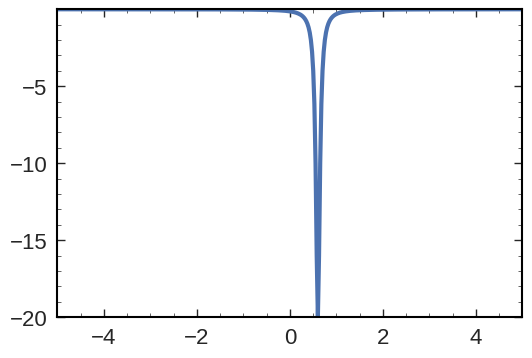

In [50]:
plt.plot(erange, imag(G[:, 0]))

In [51]:
G2 = (1 - ch.nf(omArr, T) - ch.nf(omArr, T))/(eArr - 2*omArr - 2*(ReS + 1j*ImS))

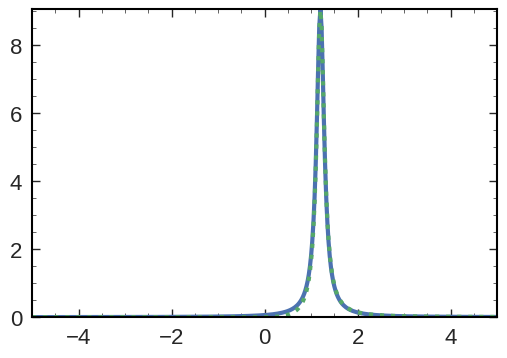

In [52]:
plt.plot(erange, imag(-G2[:, 0]))
plt.plot(erange, imag(-ch.G2[:, 0]), ls=':')
# plt.

In [53]:
trapz(imag(G2[:, 0]), dx=erange[1]-erange[0]) / -pi

0.8929212371179516

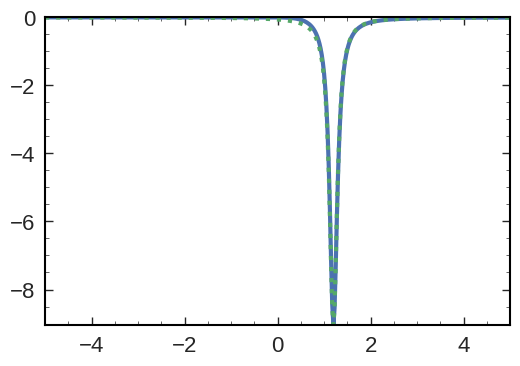

In [54]:
plt.plot(erange, ch.ImG2[:, 0])
plt.plot(erange, imag(G2[:, 0]), ls=':')

In [55]:
iImG2 = tm.InterDenom2D(qrange, erange, ascontiguousarray(nan_to_num(real(1/G2), posinf=0, neginf=0)), 
                        ascontiguousarray(nan_to_num(imag(1/G2), posinf=0, neginf=0)), 'imag')

iReG2 = tm.InterDenom2D(qrange, erange, ascontiguousarray(nan_to_num(real(1/G2), posinf=0, neginf=0)), 
                        ascontiguousarray(nan_to_num(imag(1/G2), posinf=0, neginf=0)), 'real')

(0.0, 1.5)

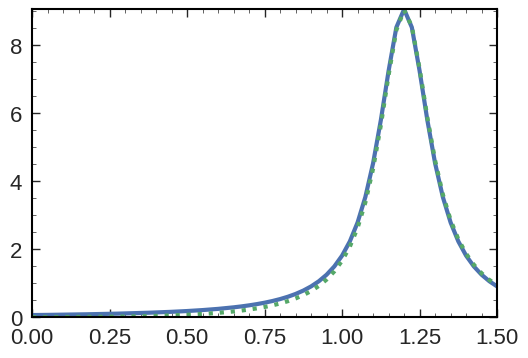

In [56]:
plt.plot(erange, [-iImG2(0., e) for e in erange])
plt.plot(erange, [-ch.iImG2(0., e) for e in erange], ls=':')
# plt.plot(erange, -imag(ch.G2[:, 0]), ls='-')

# plt.plot(erange, -imag(G2[:, 0]), ls='--')
# plt.semilogy()

plt.xlim(0, 1.5)

In [57]:
iImG2(0., 0.7), ch.iImG2(0., 0.7)

(-0.348133943709564, -0.22512497547376886)

In [58]:
X = array([
    tm.x_solve(e, 0, 0, T, ch.iVS[0], ch.iOm, iReG2, iImG2, 5, 1, 1)
    for e in erange])

X[erange < 0] = real(X[erange < 0])

TM = array([-4*pi*ch.v(q)**2 / (1 - X) for q in qrange]).transpose()

In [59]:
TM[erange < 0] = real(TM[erange < 0])

In [60]:
X2 = array([
    tm.x_solve(e, 0, 0, T, ch.iVS[0], ch.iOm, ch.iReG2, ch.iImG2, 5, 1, 1)
    for e in erange])

TM2 = array([-4*pi*ch.v(q)**2 / (1 - X2) for q in qrange]).transpose()

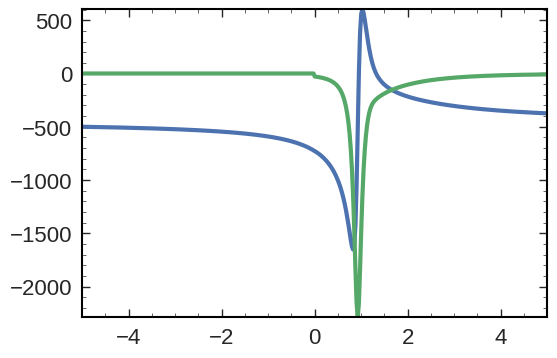

In [61]:
plt.plot(erange, TM[:, 0])
plt.plot(erange, imag(TM[:, 0]))

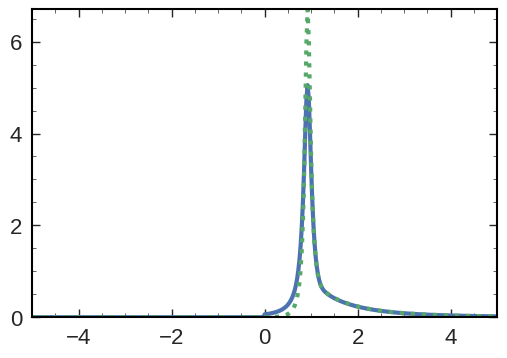

In [62]:
plt.plot(erange, imag(1 / (1 - X)))
plt.plot(erange, imag(1 / (1 - X2)), ls=':')

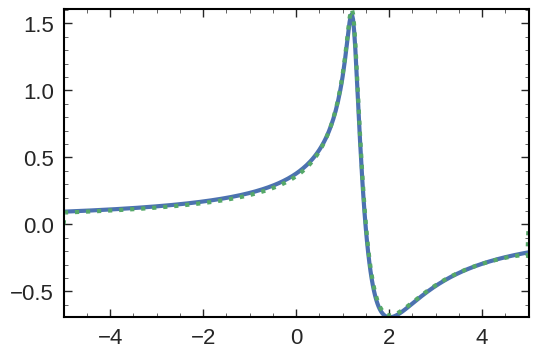

In [63]:
plt.plot(erange, real(X))
plt.plot(erange, real(X2), ls=':')

(0.0, 2.0)

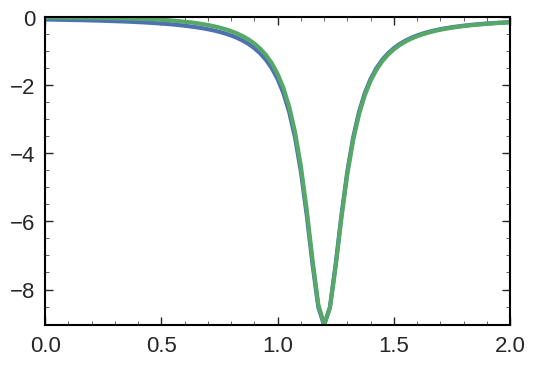

In [64]:
plt.plot(erange, [iImG2(0, e) for e in erange])
plt.plot(erange, [ch.iImG2(0, e) for e in erange])

plt.xlim(0, 2)

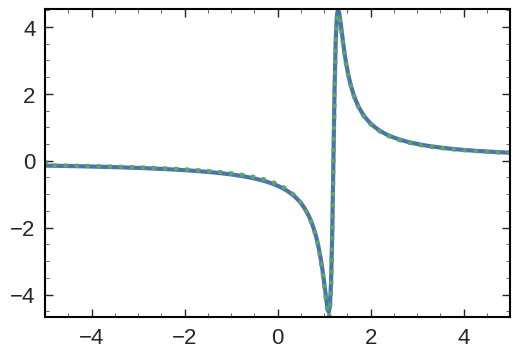

In [65]:
plt.plot(erange, [iReG2(0, e) for e in erange])
plt.plot(erange, [ch.iReG2(0, e) for e in erange], ls=':')

### Calculate $\Re G_2$ from the integral itself ($k = 0$)

In [66]:
from scipy.integrate import quad

In [67]:
def ReG2_int1(z, om2):
    return quad(lambda om1: (1 - ch.nf(om1, T) - ch.nf(om2, T))*pt.R(0, om1)*pt.R(0, om2), -5.01, 5.01, weight='cauchy', 
               wvar=z - om2)[0]
                

In [68]:
ReG2_int1(0.5, 0.2)

0.2192878163453027

In [69]:
def ReG2(z):
    return -quad(lambda om2: ReG2_int1(z, om2), -5, 5)[0]

In [70]:
# ReG2(-1)

In [71]:
ch.iReG2(0, -1)

-0.37666069803105395

In [72]:
# rr = array([ReG2(e) for e in tqdm.notebook.tqdm(erange)])

### Continue

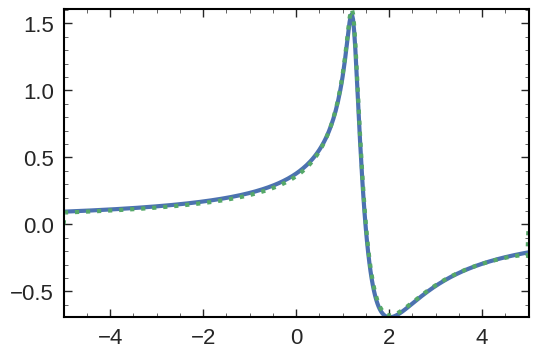

In [73]:
plt.plot(erange, real(X))
plt.plot(erange, real(X2), ls=':')

(-100.0, 100.0)

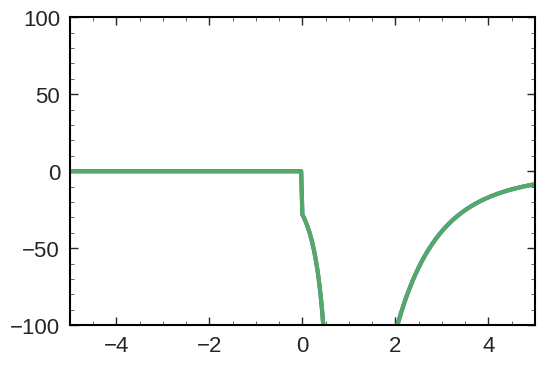

In [74]:
plt.plot(erange, imag(TM[:, 0]))
plt.plot(erange, imag(-4*pi*ch.v(0)**2/(1 - X)))
# plt.plot(erange, imag(TM2[:, 0]) ,ls=':')

# plt.xlim(-1, 2)
plt.ylim(-100, 100)

# Calculating $\Sigma$

In [75]:
iImTM = tm.InterDenom2D(qrange, erange, ascontiguousarray(nan_to_num(real(1/TM), posinf=0, neginf=0)),
                        ascontiguousarray(nan_to_num(imag(1/TM), posinf=0, neginf=0)), 'imag')

iReTM = tm.InterDenom2D(qrange, erange, ascontiguousarray(nan_to_num(real(1/TM), posinf=0, neginf=0)),
                        ascontiguousarray(nan_to_num(imag(1/TM), posinf=0, neginf=0)), 'real')

In [76]:
iEps = tm.Interpolator(qrange, pt.om0(qrange), 'cubic')

In [77]:
q = 0.

In [78]:
ImS = array([tm.SigmaQP(e, q, T, iImTM, iImG2, iEps, iEps, 0, 0, 5) for e in erange])

In [79]:
ReS = array([tm.SigmaQP(e, q, T, iReTM, iImG2, iEps, iEps, 0, 0, 5) for e in erange])

In [80]:
# ImS_num = array([tm.Efirst_k_integral(e, q, T, iImTM, pt.R, iEps, iEps) for e in tqdm.notebook.tqdm(erange)])

In [81]:
erange_dense = linspace(-5, 5, 5000)

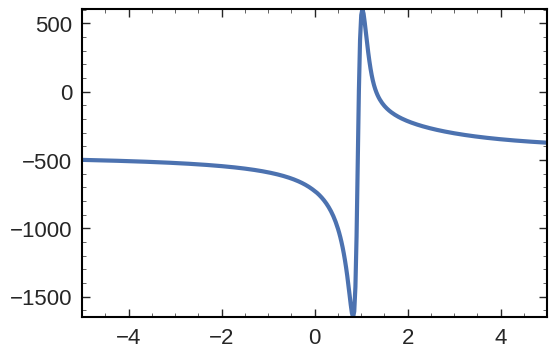

In [82]:
plt.plot(erange, real(TM[:, 0]))

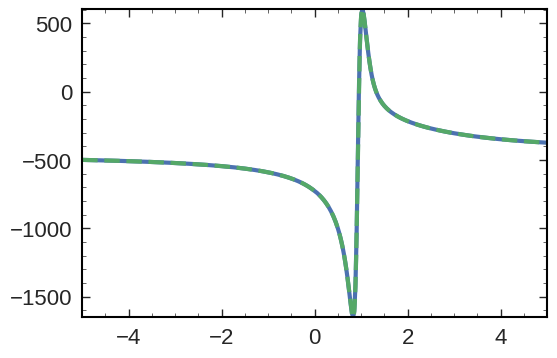

In [83]:
plt.plot(erange, real(TM[:, 0]))
plt.plot(erange_dense, [iReTM(0, e) for e in erange_dense], ls='--')

In [84]:
iImS = tm.Interpolator(erange, ImS, 'cubic')

In [85]:
ReS_KK = array([tm.ReSigmaKK(e, iImS) for e in erange])

(-1.0, 2.0)

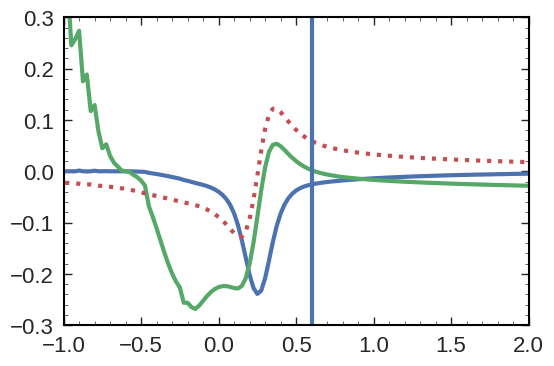

In [86]:
plt.plot(erange, ImS)
plt.plot(erange, ReS)
plt.plot(erange, ReS_KK, ls=':')


plt.ylim(-0.3, 0.3)
plt.axvline(mQ)
# plt.plot(erange, ImS_num, ls=':')

plt.xlim(-1, 2)

# Calculating $\Re \Sigma$

### KK calculation

In [29]:
ImS_tab = array([[tm.SigmaQP(e, q, T, iImTM, iImG2, iEps, iEps, 0, 0, 5) for e in erange]
                for q in tqdm.notebook.tqdm(qrange)])
# iIm = tm.Interpolator(erange, ascontiguousarray(im), 'cubic')

ImS_tab = ImS_tab.transpose()

  0%|          | 0/151 [00:00<?, ?it/s]

In [31]:
ReS_tab = []
for im in tqdm.notebook.tqdm(ImS_tab.transpose()):
    iIm = tm.Interpolator(erange, ascontiguousarray(im), 'cubic')
    re = [tm.ReSigmaKK(e, iIm) for e in erange]
    ReS_tab += [re]

ReS_tab = array(ReS_tab).transpose()

  0%|          | 0/151 [00:00<?, ?it/s]

In [151]:
# plt.plot(erange, ReS_tab[:, 0])
plt.plot(erange, ImS_tab[:, 0])
plt.xlim(-1, 2)

NameError: name 'ImS_tab' is not defined

In [58]:
erange[110]

-2.25

In [59]:
ImS_tab[110, 0]

0.055950478429678915

In [60]:
iImS(0., 0.5)

-0.03752395445038132

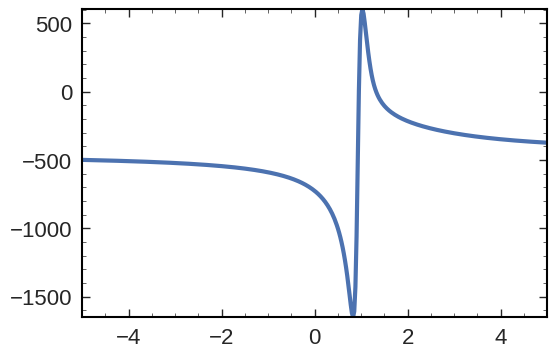

In [61]:
plt.plot(erange, np.real(TM[:, 0]))

### Solving for the new spectrum

In [62]:
iReS = tm.Interpolator2D(qrange, erange, ascontiguousarray(ReS_tab))

In [63]:
def eq(x, k):
    return x - sqrt(k**2 + mQ**2) - iReS(k, x)

(0.0, 2.0)

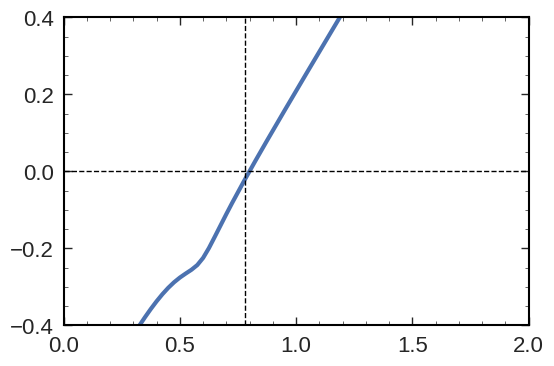

In [41]:
k = 0.5
plt.plot(erange, [eq(e, k) for e in erange])

plt.ylim(-0.4, 0.4)
plt.axhline(0, ls='--', lw=1, c='black')
plt.axvline(sqrt(mQ**2 + k**2), ls='--', lw=1, c='black')

plt.xlim(0, 2)

In [42]:
from scipy.optimize import minimize

In [43]:
omK = []
init = mQ
for k in qrange:
    sol = minimize(lambda z: eq(z[0], k)**2, mQ, bounds=[[0.9*init, 1.1*init]])
    omK += [float(sol.x)]
    # print(sol.status)
    init = sol.x

/tmp/ipykernel_102553/1428158560.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  omK += [float(sol.x)]


(0.0, 5.0)

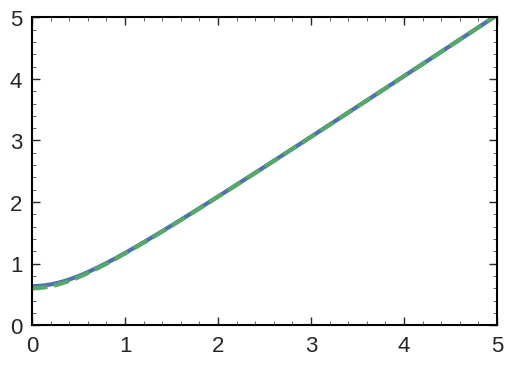

In [44]:
plt.plot(qrange, omK)
plt.plot(qrange, sqrt(mQ**2 + qrange**2), ls='--')

plt.ylim(0, 5)

In [45]:
iImS = tm.Interpolator2D(qrange, erange, ascontiguousarray(ImS_tab))

In [46]:
ImS_K = []
ReS_K = []

for k, om in zip(qrange, omK):
    ImS_K += [iImS(k, float(om))]
    ReS_K += [iReS(k, float(om))]

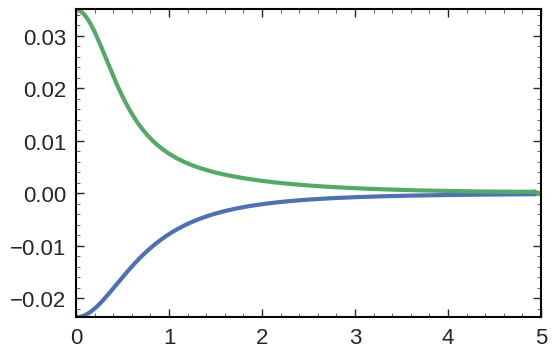

In [47]:
plt.plot(qrange, ImS_K)
plt.plot(qrange, ReS_K)

In [48]:
omArr.shape

(401, 151)

In [49]:
om_K_Arr = array([omK for e in erange])

In [50]:
om_K_Arr.shape

(401, 151)

In [51]:
G_new = 1 / (eArr - om_K_Arr - (ReS_tab + 1j*ImS_tab))

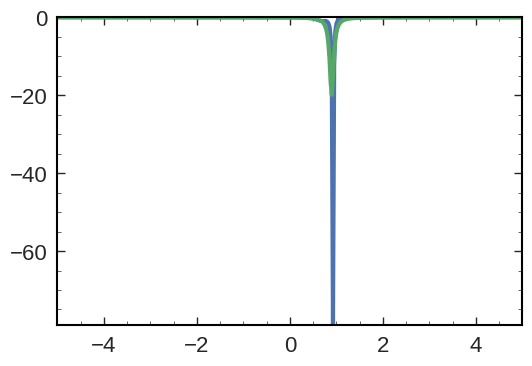

In [52]:
plt.plot(erange, imag(G_new[:, 20]))
plt.plot(erange, imag(G[:, 20]))

In [53]:
G2_new = (1 - ch.nf(om_K_Arr, T) - ch.nf(eArr - om_K_Arr, T))/(eArr - 2*om_K_Arr - 2*(ReS_tab + 1j*ImS_tab))

In [54]:
iImG2_new = tm.InterDenom2D(qrange, erange, ascontiguousarray(nan_to_num(real(1/G2_new), posinf=0, neginf=0)), 
                        ascontiguousarray(nan_to_num(imag(1/G2_new), posinf=0, neginf=0)), 'imag')

iReG2_new = tm.InterDenom2D(qrange, erange, ascontiguousarray(nan_to_num(real(1/G2_new), posinf=0, neginf=0)), 
                        ascontiguousarray(nan_to_num(imag(1/G2_new), posinf=0, neginf=0)), 'real')

/tmp/ipykernel_102553/136381910.py:1: RuntimeWarning: divide by zero encountered in divide
  iImG2_new = tm.InterDenom2D(qrange, erange, ascontiguousarray(nan_to_num(real(1/G2_new), posinf=0, neginf=0)),
/tmp/ipykernel_102553/136381910.py:1: RuntimeWarning: invalid value encountered in divide
  iImG2_new = tm.InterDenom2D(qrange, erange, ascontiguousarray(nan_to_num(real(1/G2_new), posinf=0, neginf=0)),
/tmp/ipykernel_102553/136381910.py:2: RuntimeWarning: divide by zero encountered in divide
  ascontiguousarray(nan_to_num(imag(1/G2_new), posinf=0, neginf=0)), 'imag')
/tmp/ipykernel_102553/136381910.py:2: RuntimeWarning: invalid value encountered in divide
  ascontiguousarray(nan_to_num(imag(1/G2_new), posinf=0, neginf=0)), 'imag')
/tmp/ipykernel_102553/136381910.py:4: RuntimeWarning: divide by zero encountered in divide
  iReG2_new = tm.InterDenom2D(qrange, erange, ascontiguousarray(nan_to_num(real(1/G2_new), posinf=0, neginf=0)),
/tmp/ipykernel_102553/136381910.py:4: RuntimeWarning: 

In [55]:
X_new = array([
    tm.x_solve(e, 0, 0, T, ch.iVS[0], ch.iOm, iReG2_new, iImG2_new, 5, 1, 1)
    for e in erange])

TM_new = array([-4*pi*ch.v(q)**2 / (1 - X_new) for q in qrange]).transpose()

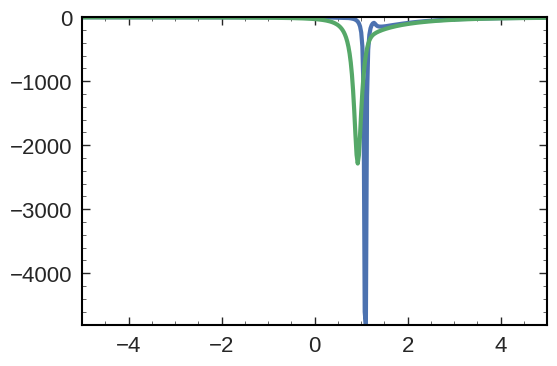

In [56]:
plt.plot(erange, imag(TM_new[:, 0]))
plt.plot(erange, imag(TM[:, 0]))